In [1]:
# core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# For Grid search
from sklearn.model_selection import GridSearchCV

# data
from sklearn.datasets import load_breast_cancer
%matplotlib inline

# Supervised Learning - Classification 

### Cancer Dataset

In [2]:
data = load_breast_cancer()
print(data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
(
    X_train,
    X_test,
    y_train,
    y_test
) = train_test_split(
    data.data, 
    data.target, 
    stratify=data.target,
    test_size = 0.33,
    random_state=0
)

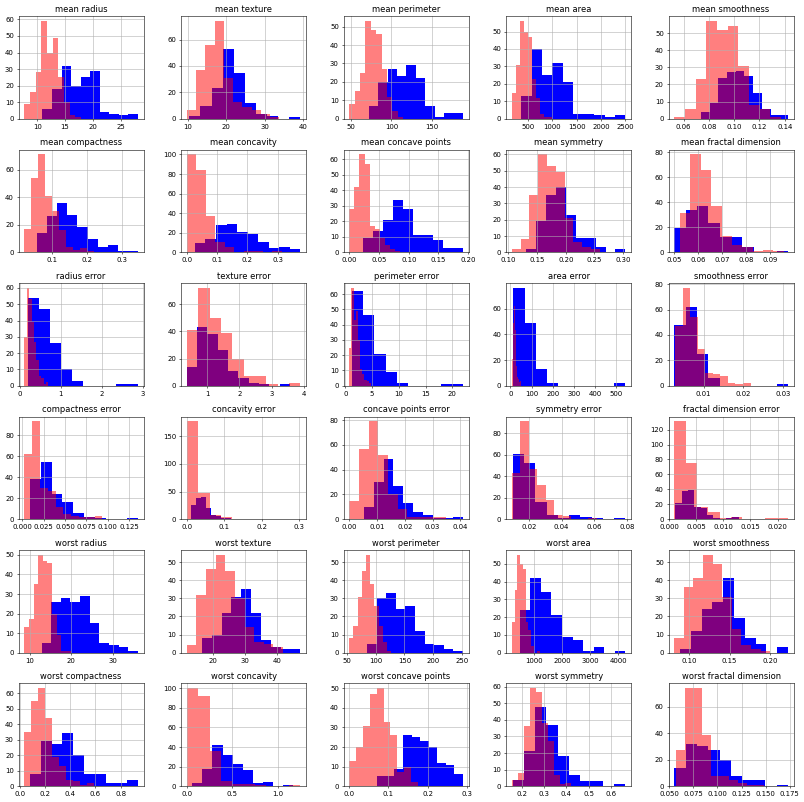

In [4]:
dataf = (
    pd.DataFrame(X_train, columns=data["feature_names"])
    .assign(target=y_train)
)
fig, axes = plt.subplots(figsize=(20,20), dpi=50, nrows=6, ncols=5)

# BLUE COLOR == 'benign', RED COLOR == 'malignant'
dataf[dataf["target"] == 0].drop("target", axis=1).hist(ax=axes, alpha=1, label='benign',color='b')
dataf[dataf["target"] == 1].drop("target", axis=1).hist(ax=axes, alpha=0.5, label='malignant',color='r');
del dataf, fig, axes # free memory

## Question 1
Exploratory data analysis (EDA)
- Print the target counts for your training data. 
- Explain, briefly and in bullets, what we may learn from the feature plots above. (For example, which features seem to be best differentiators between the two classes - benign and malignant) - BLUE COLOR == 'benign', RED COLOR == 'malignant'
- Based on the distributions above, would scaling be required for, say, a neural network?
<br>

- Industry reflections: Consider the data and its size. For this domain, is it enough data? Would you ask the domain experts anything?

In [5]:
# Counting the data of the training data. https://numpy.org/doc/stable/reference/generated/numpy.bincount.html
np.bincount(y_train)


array([142, 239], dtype=int64)

In [6]:
# Showing the order in which the counts are shown
data.target_names

array(['malignant', 'benign'], dtype='<U9')

### Question 2
Create a KNeighborsClassifier for the above train and test data. Print the training and test accuracy. 
- (If using gridsearch on (X_train, y_train), document your choices of model parameters and ranges.)
- Bonus: Use .predict_proba and plot the result using plt.hist(probas[:, 1]) - What can this tell us?

In [7]:
# Creating a model
knn = KNeighborsClassifier()

# Preparing params for GridSearch
params = {'n_neighbors':[5,10,20], 'weights':['uniform','distance']}

# Implementing Gridsearch
knn_grid = GridSearchCV(estimator=knn,
                    param_grid=params,
                    cv=2, # We are not asked to use cross validation, there it is set to 1.
                    verbose=3) # Setting verbose on 3 to see the different results from the iterations

# Fitting the model on the val data instead of the normal train data
knn_grid.fit(X_train, y_train)

# Assessing the score and the parameters
knn_grid.best_score_, knn_grid.best_params_

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END ....n_neighbors=5, weights=uniform;, score=0.927 total time=   0.1s
[CV 2/2] END ....n_neighbors=5, weights=uniform;, score=0.932 total time=   0.0s
[CV 1/2] END ...n_neighbors=5, weights=distance;, score=0.942 total time=   0.0s
[CV 2/2] END ...n_neighbors=5, weights=distance;, score=0.921 total time=   0.0s
[CV 1/2] END ...n_neighbors=10, weights=uniform;, score=0.916 total time=   0.0s
[CV 2/2] END ...n_neighbors=10, weights=uniform;, score=0.932 total time=   0.0s
[CV 1/2] END ..n_neighbors=10, weights=distance;, score=0.916 total time=   0.0s
[CV 2/2] END ..n_neighbors=10, weights=distance;, score=0.932 total time=   0.0s
[CV 1/2] END ...n_neighbors=20, weights=uniform;, score=0.911 total time=   0.0s
[CV 2/2] END ...n_neighbors=20, weights=uniform;, score=0.889 total time=   0.0s
[CV 1/2] END ..n_neighbors=20, weights=distance;, score=0.911 total time=   0.0s
[CV 2/2] END ..n_neighbors=20, weights=distance;,

(0.931730504271149, {'n_neighbors': 5, 'weights': 'distance'})

In [8]:
# Using the best model, made from the grid search.
# Seeing the result on the test set although you are not supposed to fit the model based on test set.
print("Accuracy on test set: {:.3f}".format(knn_grid.score(X_test, y_test)))

Accuracy on test set: 0.915


In [9]:
# Making another model with the same parameters
knn_1 = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn_1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(knn_1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn_1.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.915


(array([ 52.,   7.,   2.,   5.,   4.,   0.,   2.,   5.,   7., 104.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

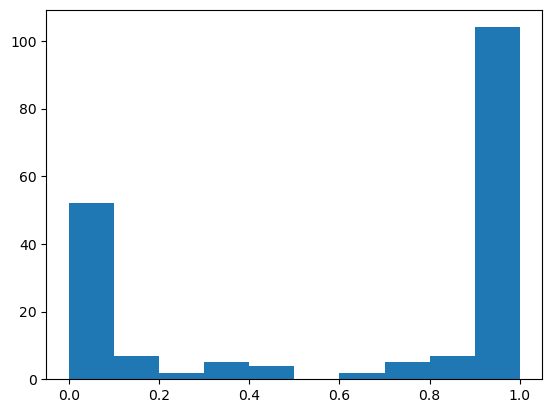

In [10]:
# Using the predict_proba function and afterwards displaying it.
probas = knn_grid.predict_proba(X_test)

# Displaying the result. Not sure whaat this tells us?
plt.hist(probas[:, 1])

## Question 3
We'd like to try several other models. To save some work, write a function called eval_model that takes two arguments
<ul>
    <li>model: an instantiated classifier model</li>
    <li>name: a string, eg, "knn"</li>
</ul>
    
You can create a model like this:

knn = KNeighborsClassifier()

Then you can pass knn to the function as the model. The function should fit the model to X_train, and y_train, which should already be defined as global variables. Then it should score to model on the training and test data. X_test and y_test should also be defined as global variables.

- You can use gridsearch in the function. Same rules as stated in Q2




In [11]:
# Making a model for evaluating multiple models at one time
def eval_model(model,name):
    model.fit(X_train, y_train)
    print(name)
    print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))
    print(" ")
    
    
# Setting up variable to be put in the function eval_model
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
mlp = MLPClassifier(max_iter=10000)
    
# Evaluating the different models
eval_model(knn, 'KNN')
eval_model(dtc, 'DTC')
eval_model(mlp, 'MLP')


KNN
Accuracy on training set: 0.945
Accuracy on test set: 0.915
 
DTC
Accuracy on training set: 1.000
Accuracy on test set: 0.931
 
MLP
Accuracy on training set: 0.948
Accuracy on test set: 0.941
 


In [12]:
# Here a function that incoporates GridSearch. Output is accuracy and the best params.
def eval_model(model, params, name):
    grid = GridSearchCV(estimator=model, # The desired model is called from the model that is to be defined
                    param_grid=params, # The object is called by the later defined variable
                    cv=2)  # Using cross validation
    grid.fit(X_train, y_train)
    print(name)
    print("Accuracy on training set: {:.3f}".format(grid.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(grid.score(X_test, y_test)))
    print("Best params: ", grid.best_params_) # Printing the best params
    print(" ")
    
# Setting up variables for the models to be tested. Next Params are defined for the gridSearch to be put in the function eval_model
knn = KNeighborsClassifier()
knnParams = {'n_neighbors':[5,10,15]}

    
# Evaluating the model, which in this case also works as a test
eval_model(knn, knnParams, 'KNN')


KNN
Accuracy on training set: 0.945
Accuracy on test set: 0.915
Best params:  {'n_neighbors': 5}
 


## Question 4
Now use eval_model to evaluate LogisticRegression, DecisionTreeClassifier, RandomForestClassifier and MLPClassifier. 
- Bonus: Plot the train and test accuracies for all estimators in a bar chart (Is this a fair comparison?)
 

In [13]:
#Setting up the models with relevant parameters to tune. scikit learn documentation is used for each model to find parameters.
lr = LogisticRegression(max_iter=10000)
lrParams = {'C':[0.001,0.01,0.1,1,10,100]} 

dtc = DecisionTreeClassifier()
dtcParams = {'max_depth':[3,4,5,6], 'min_samples_leaf':[5,7,9,11]} # Based on the size of the data set these values seem appropriate 

rfc = RandomForestClassifier()
rfcParams = {'n_estimators':[10,60,110,160], 'max_depth':[3,5,7] } # Again taken the size of the dataset in mind, these values seems appropriate

mlp = MLPClassifier(max_iter=10000)
mlpParams = {'hidden_layer_sizes':[50,100,150]}

# Running eval_model to see the different results from all the models
eval_model(lr, lrParams, 'lr')
eval_model(dtc, dtcParams, 'DTC')
eval_model(rfc, rfcParams,'RFC')
eval_model(mlp, mlpParams, 'MLP')

lr
Accuracy on training set: 0.958
Accuracy on test set: 0.947
Best params:  {'C': 0.01}
 
DTC
Accuracy on training set: 0.966
Accuracy on test set: 0.931
Best params:  {'max_depth': 3, 'min_samples_leaf': 5}
 
RFC
Accuracy on training set: 0.997
Accuracy on test set: 0.947
Best params:  {'max_depth': 5, 'n_estimators': 10}
 
MLP
Accuracy on training set: 0.958
Accuracy on test set: 0.941
Best params:  {'hidden_layer_sizes': 100}
 


In [14]:
# Plotting all the accuracies in a bar chart


Question 5:
Apply a scaling method (e.g., standard scaling) to your data and repeat question 4 with the scaled data.
- Remember that (X_test, y_test) are meant to be unseen data. Use this to decide what the scaler should fit to and transform on.
- Report the results of scaling the data
- Bonus: Explain what the scaler accomplishes for us.

In [15]:
# First the data is scaled with the scaler function. https://www.digitalocean.com/community/tutorials/standardscaler-function-in-python
scaler = StandardScaler() # Getting the scaler model

# Scaling the data. The target variable is not scaled, since it is binary.
X_trainS = scaler.fit_transform(X_train)
X_testS = scaler.fit_transform(X_test)

# Checking the result of the scaling
# X_trainS, X_testS


In [16]:
# New scaled variables have been made and therefore the model_eval needs a little update with the scaled versions.
def eval_modelS(model, params, name):
    grid = GridSearchCV(estimator=model, # The desired model is called from the model that is to be defined
                    param_grid=params, # The object is called by the later defined variable
                    cv=2)  # Using cross validation
    grid.fit(X_trainS, y_train) # The scaled version of the data is used to fit the model(s)
    print(name)
    print("Accuracy on training set: {:.3f}".format(grid.score(X_trainS, y_train)))
    print("Accuracy on test set: {:.3f}".format(grid.score(X_testS, y_test)))
    print("Best params: ", grid.best_params_) # Printing the best params
    print(" ")

In [17]:
# The new evaluation models is used, eval_modelS to see the different results from all the models with the scaled data. Using the same models and params defined eralier including the KNN
eval_modelS(knn, knnParams, 'KNN')
eval_modelS(lr, lrParams, 'lr')
eval_modelS(dtc, dtcParams, 'DTC')
eval_modelS(rfc, rfcParams,'RFC')
eval_modelS(mlp, mlpParams, 'MLP')

KNN
Accuracy on training set: 0.976
Accuracy on test set: 0.952
Best params:  {'n_neighbors': 5}
 
lr
Accuracy on training set: 0.992
Accuracy on test set: 0.968
Best params:  {'C': 1}
 
DTC
Accuracy on training set: 0.966
Accuracy on test set: 0.920
Best params:  {'max_depth': 3, 'min_samples_leaf': 5}
 
RFC
Accuracy on training set: 1.000
Accuracy on test set: 0.947
Best params:  {'max_depth': 7, 'n_estimators': 60}
 
MLP
Accuracy on training set: 0.997
Accuracy on test set: 0.957
Best params:  {'hidden_layer_sizes': 100}
 


## Question 6
Train a logistic regression estimator on a scaled version of X_train.

Then print the three features with the highest coefficients -- these are the features which the model most strongly links with the target, <i>malignant</i>. Print the three features with the lowest coefficients -- these are the features which the model most strongly links with the target, <i>benign</i>. On each line, print the feature name, followed by its coefficient value.

- Bonus: Plot the coefficients in a bar chart (*plt.bar()*) with the variable names on the x axis

In [18]:
# Getting a logistic regression model with the recommended parameters from the earlier grid search
lr2 = LogisticRegression(C=1)

# Fitting the model on the scaled training set
lr2.fit(X_trainS, y_train)

LogisticRegression(C=1)

In [19]:
# Got help from ChatGPT on this one

# Getting the feature names. However, i am having troubles with this one. I realize it has something with not using pandas.
# feature_names = X_trainS.columns

# Getting the coefficients
coef = lr2.coef_[0]

# Sort the coefficients in descending order. https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
sorted_index = np.argsort(coef)

# Print the three features with the highest coefficients. If the feature names had worked: print(f"{feature_names[i]}: {coef[i]}")
print("Features with the highest coefficients:")
for i in sorted_index[-3:]:
    print(f"{[i]}: {coef[i]}")

# Print the three features with the lowest coefficients
print("Features with the lowest coefficients:")
for i in sorted_index[:3]:
    print(f"{[i]}: {coef[i]}")

Features with the highest coefficients:
[19]: 0.39967782128961965
[18]: 0.48603193963311236
[15]: 0.5975211218199216
Features with the lowest coefficients:
[21]: -1.0724828206381871
[10]: -1.0580748755106253
[7]: -1.0121099296381786


In [23]:
# Code from feedback of the hand-in. Need to ask, what to do from here. These are the names, but how do i retreive them?
sorted_coefs = sorted ((zip(data.feature_names, coef)), key = lambda e:e[1], reverse=True )
print (sorted_coefs)

[('compactness error', 0.5975211218199216), ('symmetry error', 0.48603193963311236), ('fractal dimension error', 0.39967782128961965), ('mean compactness', 0.39270520830322125), ('mean fractal dimension', 0.37340666088635205), ('concavity error', 0.10345870287054076), ('mean smoothness', -0.005619749883586474), ('texture error', -0.05108763253922353), ('worst compactness', -0.1317239480519091), ('mean symmetry', -0.1732608030514284), ('smoothness error', -0.2363387674357753), ('concave points error', -0.2860437580867342), ('mean texture', -0.40246546768287916), ('worst smoothness', -0.539211960535426), ('perimeter error', -0.5476779757820659), ('mean perimeter', -0.549192811505257), ('mean radius', -0.5735501260987577), ('worst concavity', -0.6115964432077087), ('mean area', -0.6137494300248938), ('worst symmetry', -0.6516969205931168), ('area error', -0.6651839142682077), ('worst concave points', -0.7399124186717577), ('worst fractal dimension', -0.751458902024378), ('mean concavity',

## Question 7
Print the 3 features that are the <i>least</i> informative about our target value (Hint: you should use the absolute value of coefficients.)

In [28]:
# I need a bigger hint on this one

c_abs = list(map(abs, coef))

print("Features that are the least informative, based on absolute values:")
for i in c_abs[:3]:
    print(f"{[i]}: {coef[i]}")

Features that are the least informative, based on absolute values:


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## Question 8
Use the classification_report function with the logreg model. It takes two arguments:
<ul>
    <li>y_test: the correct classifications</li>
    <li>preds: the model predictions. (You should assign logreg.predict(X_test) to preds.)</li>
    </ul>
    
There is an optional third argument, which is the feature names. You can write target_names=data.target_names.
        

In [ ]:
# Predicting
preds = lr2.predict(X_testS)

# Classification report is printed with the target_names
print(classification_report(y_test, preds, target_names=data.target_names))

## Question 9
For prediction probabilities (.predict_proba), predictions are related to these probabilities as follows: If the second probability is greater than .5, the prediction is 1. Otherwise, it's 0.  

1. Use the predict_proba method to get the probabilities of the logreg predictions on the X_test data. 
- Bonus: As in Q2, plot the the probabilities of class 1 (Malignant) and compare the plot with the same plot from Q2

2. Convert the probabilites to an arrray of predictions by mapping the following lambda function <br>
lambda a:1 if a[1]>.5 else 0

3. Show that the resulting array is equal to the original preds array, e.g., using numpy.array.equal or all()

4. Try to make the code below under *'Accuracies over probabilities* work. You need to supply 'preds' (from .predict) and 'probas' (from .predict_proba) - What can the resulting plot tell us about our model?


In [ ]:
# Predicting probabilities
probas_pre = lr2.predict_proba(X_testS)

# Displaying with a plot as in Q2
plt.hist(probas[:, 1])

In [ ]:
# Mapping the probabilities to an array
#probas = list(map(lambda x: 0 if x < 0.5 else 1, probas_pre))
#print(probas)

# Got help from ChatGPT on this one.
probas = np.where(probas_pre < 0.5, 0, 1)
probas = probas.tolist()
print(probas)

In [ ]:
# Showing that the original preds is the same as the new. https://numpy.org/doc/stable/reference/generated/numpy.array_equal.html
np.array_equal(preds,probas)

In [ ]:
# Not sure how I should have done differently

# Showing each of the two
print(np.array(probas), np.array(preds))

### Accuracy over probabilities

In [ ]:
preds_df = (
    pd.DataFrame(
        {
            "preds": preds, # the predicted class
             "probas": probas[:, 1], # the predicted probability of class 1
             "y_test": y_test, # the true class
             "proba_bins": pd.cut(probas[:, 1], bins=20) # the bins (0.05) of the predicted probability
        }
    )
)

intervals, accs = [], []
for idx, interval in preds_df.groupby("proba_bins"):
    if not interval.empty:
        intervals.append(idx.right)
        accs.append(accuracy_score(interval["y_test"], interval["preds"]))

# plot accs over intervals
plt.figure(figsize=(10, 3))
plt.plot(intervals, accs) 
plt.xlabel("Probability bins (size 0.1)")
plt.ylabel("Accuracy")
plt.ylim(.0, 1.1)
plt.title("Accuracy over bins of predicted probabilities");

## Question 10
Write a function, predict_threshold, that takes two arguments:
<ul>
    <li>probas: the output of predict_proba (for a binary classification task)</li>
    <li>t: a threshold probability. Class 1 is predicted if the probability is greater than t. Otherwise class 0 is predicted.</li>
</ul>

In [ ]:
# Making a function that can iterate through different threshold values
def predict_threshold (probas,t):
    probas = probas.predict_proba(X_testS)
    probas = np.where(probas_pre < t, 0, 1)
    probas = probas.tolist()
    print(probas)

# Defining variables
model1 = lr2
Threshold = [0.5, 0.6, 0.7, 0.8, 0.9]

# Applying the function
predict_threshold(model1, Threshold)

# Unfortunately we see an error here.

Now produce a classification report for several different thresholds, using the probabilities output by logistic regression for the Cancer data. 
- Find a threshold that maximizes the precision for benign. 
- Find a threshold that maximizes precision for malignant. 
- Experiment with different thresholds -- what do you think is the best theshold for this particular domain - Predicting breast cancer? Why?